In [58]:
#Analyzing broker data
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#Our forecasting horizon
HORIZON = 10

In [60]:
EURUSD_BROKER_A = pd.read_csv("EURUSD BROKER A.csv")
EURUSD_BROKER_B = pd.read_csv("EURUSD BROKER B.csv")

In [61]:
def format_data(f_data):
    #First make a copy of the data, so we always preserve the original data
    f_data_copy = f_data.copy()
    #Format the time correctly, form seconds to human readable formats
    f_data_copy['time'] = pd.to_datetime(f_data_copy['time'],unit='s')
    return(f_data_copy)

In [62]:
A = format_data(EURUSD_BROKER_A)
B = format_data(EURUSD_BROKER_B)

In [63]:
# Rename all columns in B (except the join key)
B = B.rename(columns=lambda col: col + ' B' if col != 'id' else col)
B

Unnamed: 0 B     time B   open B   high B    low B  close B  \
0                0 2020-08-30  1.19077  1.19205  1.19019  1.19172   
1                1 2020-08-31  1.19172  1.19662  1.18843  1.19369   
2                2 2020-09-01  1.19370  1.20116  1.19014  1.19228   
3                3 2020-09-02  1.19227  1.19243  1.18222  1.18460   
4                4 2020-09-03  1.18460  1.18647  1.17891  1.18416   
...            ...        ...      ...      ...      ...      ...   
1455          1455 2025-04-30  1.13906  1.13996  1.13170  1.13222   
1456          1456 2025-05-01  1.13223  1.13410  1.12657  1.12957   
1457          1457 2025-05-02  1.12958  1.13811  1.12738  1.12990   
1458          1458 2025-05-04  1.12998  1.13278  1.12903  1.13210   
1459          1459 2025-05-05  1.13210  1.13649  1.12970  1.13123   

      tick_volume B  spread B  real_volume B  
0              4274         0              0  
1             76250         0              0  
2            104056         0              0  
3             84150         0              0  
4             91493         0              0  
...             ...       ...            ...  
1455         135547         2              0  
1456         119685         2              0  
1457         145275         2              0  
1458           8576         2              0  
1459         124274         2              0  

[1460 rows x 9 columns]

In [64]:
# Rename all columns in A (except the join key)
A = A.rename(columns=lambda col: col + ' A' if col != 'id' else col)
A

Unnamed: 0 A     time A   open A   high A    low A  close A  \
0                0 2019-09-19  1.10275  1.10730  1.10217  1.10387   
1                1 2019-09-20  1.10392  1.10669  1.09949  1.10150   
2                2 2019-09-23  1.10087  1.10242  1.09648  1.09907   
3                3 2019-09-24  1.09915  1.10231  1.09825  1.10170   
4                4 2019-09-25  1.10185  1.10217  1.09360  1.09400   
...            ...        ...      ...      ...      ...      ...   
1455          1455 2025-04-29  1.14208  1.14219  1.13701  1.13847   
1456          1456 2025-04-30  1.13831  1.13994  1.13171  1.13265   
1457          1457 2025-05-01  1.13284  1.13410  1.12657  1.12910   
1458          1458 2025-05-02  1.12875  1.13809  1.12742  1.12996   
1459          1459 2025-05-05  1.13021  1.13649  1.12926  1.13137   

      tick_volume A  spread A  real_volume A  
0             69697         5              0  
1             66100        10              0  
2             69068        11              0  
3             65730        11              0  
4             65409         1              0  
...             ...       ...            ...  
1455         102404         8              0  
1456         102704         8              0  
1457          89476         8              0  
1458         113140         8              0  
1459          92629         8              0  

[1460 rows x 9 columns]

In [65]:
combined = pd.concat([A,B],axis=1)

In [66]:
combined['Null'] = 0

In [67]:
combined

Unnamed: 0 A     time A   open A   high A    low A  close A  \
0                0 2019-09-19  1.10275  1.10730  1.10217  1.10387   
1                1 2019-09-20  1.10392  1.10669  1.09949  1.10150   
2                2 2019-09-23  1.10087  1.10242  1.09648  1.09907   
3                3 2019-09-24  1.09915  1.10231  1.09825  1.10170   
4                4 2019-09-25  1.10185  1.10217  1.09360  1.09400   
...            ...        ...      ...      ...      ...      ...   
1455          1455 2025-04-29  1.14208  1.14219  1.13701  1.13847   
1456          1456 2025-04-30  1.13831  1.13994  1.13171  1.13265   
1457          1457 2025-05-01  1.13284  1.13410  1.12657  1.12910   
1458          1458 2025-05-02  1.12875  1.13809  1.12742  1.12996   
1459          1459 2025-05-05  1.13021  1.13649  1.12926  1.13137   

      tick_volume A  spread A  real_volume A  Unnamed: 0 B     time B  \
0             69697         5              0             0 2020-08-30   
1             66100        10              0             1 2020-08-31   
2             69068        11              0             2 2020-09-01   
3             65730        11              0             3 2020-09-02   
4             65409         1              0             4 2020-09-03   
...             ...       ...            ...           ...        ...   
1455         102404         8              0          1455 2025-04-30   
1456         102704         8              0          1456 2025-05-01   
1457          89476         8              0          1457 2025-05-02   
1458         113140         8              0          1458 2025-05-04   
1459          92629         8              0          1459 2025-05-05   

       open B   high B    low B  close B  tick_volume B  spread B  \
0     1.19077  1.19205  1.19019  1.19172           4274         0   
1     1.19172  1.19662  1.18843  1.19369          76250         0   
2     1.19370  1.20116  1.19014  1.19228         104056         0   
3     1.19227  1.19243  1.18222  1.18460          84150         0   
4     1.18460  1.18647  1.17891  1.18416          91493         0   
...       ...      ...      ...      ...            ...       ...   
1455  1.13906  1.13996  1.13170  1.13222         135547         2   
1456  1.13223  1.13410  1.12657  1.12957         119685         2   
1457  1.12958  1.13811  1.12738  1.12990         145275         2   
1458  1.12998  1.13278  1.12903  1.13210           8576         2   
1459  1.13210  1.13649  1.12970  1.13123         124274         2   

      real_volume B  Null  
0                 0     0  
1                 0     0  
2                 0     0  
3                 0     0  
4                 0     0  
...             ...   ...  
1455              0     0  
1456              0     0  
1457              0     0  
1458              0     0  
1459              0     0  

[1460 rows x 19 columns]

In [68]:
A

Unnamed: 0 A     time A   open A   high A    low A  close A  \
0                0 2019-09-19  1.10275  1.10730  1.10217  1.10387   
1                1 2019-09-20  1.10392  1.10669  1.09949  1.10150   
2                2 2019-09-23  1.10087  1.10242  1.09648  1.09907   
3                3 2019-09-24  1.09915  1.10231  1.09825  1.10170   
4                4 2019-09-25  1.10185  1.10217  1.09360  1.09400   
...            ...        ...      ...      ...      ...      ...   
1455          1455 2025-04-29  1.14208  1.14219  1.13701  1.13847   
1456          1456 2025-04-30  1.13831  1.13994  1.13171  1.13265   
1457          1457 2025-05-01  1.13284  1.13410  1.12657  1.12910   
1458          1458 2025-05-02  1.12875  1.13809  1.12742  1.12996   
1459          1459 2025-05-05  1.13021  1.13649  1.12926  1.13137   

      tick_volume A  spread A  real_volume A  
0             69697         5              0  
1             66100        10              0  
2             69068        11              0  
3             65730        11              0  
4             65409         1              0  
...             ...       ...            ...  
1455         102404         8              0  
1456         102704         8              0  
1457          89476         8              0  
1458         113140         8              0  
1459          92629         8              0  

[1460 rows x 9 columns]

In [69]:
inputs = ['open A','high A','low A','close A','tick_volume A','spread A','open B','high B','low B','close B','tick_volume B','spread B']

In [70]:
#Label the data
combined['A Target'] = combined['close A'].shift(-HORIZON) - combined['close A']
combined['B Target'] = combined['close B'].shift(-HORIZON) - combined['close B']

#Drop the last HORIZON rows of data
combined = combined.iloc[:-HORIZON,:]

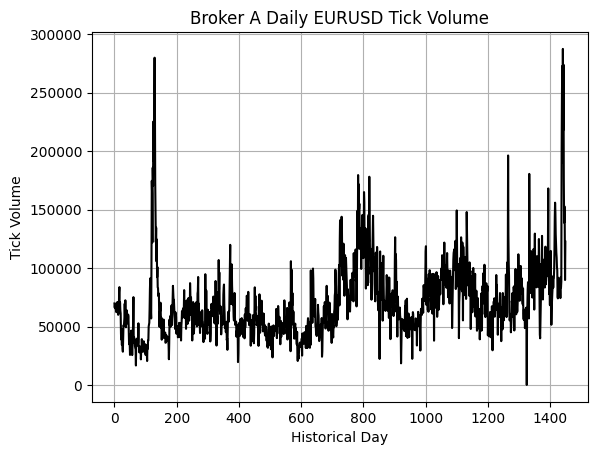

In [71]:
plt.title('Broker A Daily EURUSD Tick Volume')
plt.plot(combined['tick_volume A'],color='black')
plt.ylabel('Tick Volume')
plt.xlabel('Historical Day')
plt.grid()

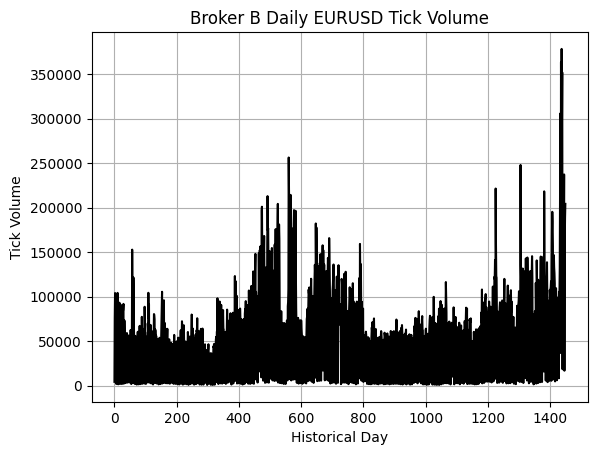

In [72]:
plt.title('Broker B Daily EURUSD Tick Volume')
plt.plot(combined['tick_volume B'],color='black')
plt.ylabel('Tick Volume')
plt.xlabel('Historical Day')
plt.grid()

Text(0, 0.5, 'Return')

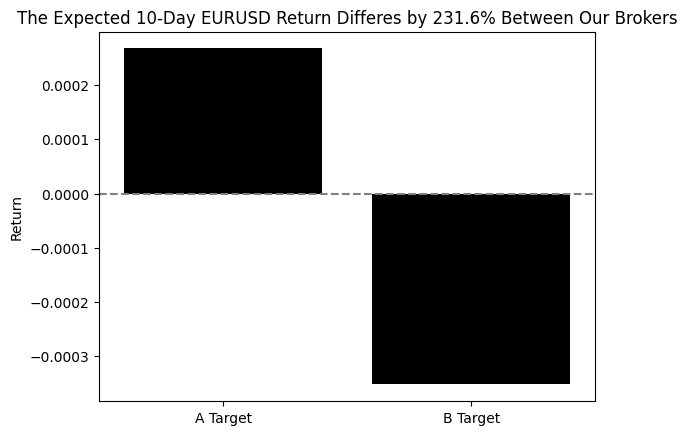

In [73]:
#What's the average 10-Day EURUSD return from both brokers
delta_return = str(((combined.iloc[:,-2:].mean()[0]-combined.iloc[:,-2:].mean()[1]) / combined.iloc[:,-2:].mean()[0]) * 100)

t = 'The Expected 10-Day EURUSD Return Differes by ' + delta_return[:5] + '% Between Our Brokers'

sns.barplot(combined.iloc[:,-2:].mean(),color='black')
plt.axhline(0,color='grey',linestyle='--')
plt.title(t)
plt.ylabel('Return')

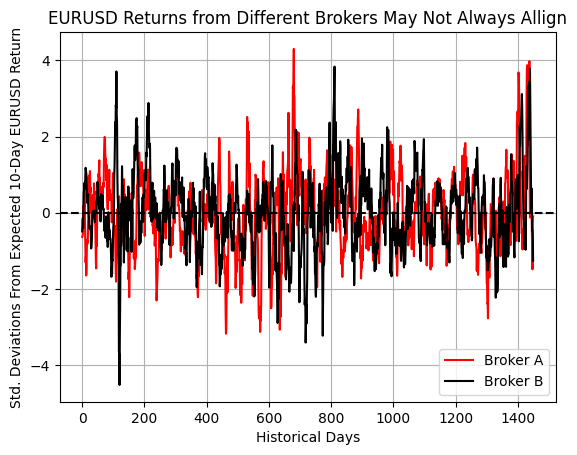

In [74]:
plt.plot(((combined.iloc[:,-1]-combined.iloc[:,-1].mean())/combined.iloc[:,-1].std()),color='red')
plt.plot(((combined.iloc[:,-2]-combined.iloc[:,-2].mean())/combined.iloc[:,-2].std()),color='black')
plt.grid()
plt.axhline(0,color='black',linestyle='--')
plt.ylabel('Std. Deviations From Expected 10-Day EURUSD Return')
plt.xlabel('Historical Days')
plt.title('EURUSD Returns from Different Brokers May Not Always Allign')
plt.legend(['Broker A','Broker B'])

Text(0, 0.5, 'Vriance of Returns')

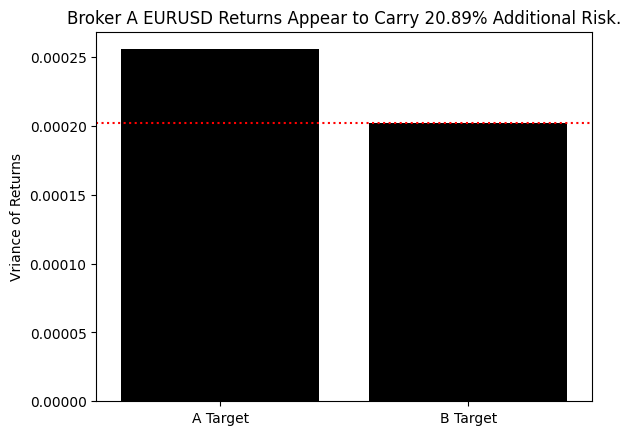

In [75]:
#The variance of returns is not the same across both brokers, broker A is riskier
delta_var = str(((combined.iloc[:,-2:].var()[0]-combined.iloc[:,-2:].var()[1]) / combined.iloc[:,-2:].var()[0]) * 100)

t = 'Broker A EURUSD Returns Appear to Carry '+ delta_var[:5]+'% Additional Risk.'

sns.barplot(combined.iloc[:,-2:].var(),color='black')
plt.axhline(np.min(combined.iloc[:,-2:].var()),color='red',linestyle=':')
plt.title(t)
plt.ylabel('Vriance of Returns')

Percent Change in Maximum Return: 1.3138686131386474%


Text(0, 0.5, 'Return')

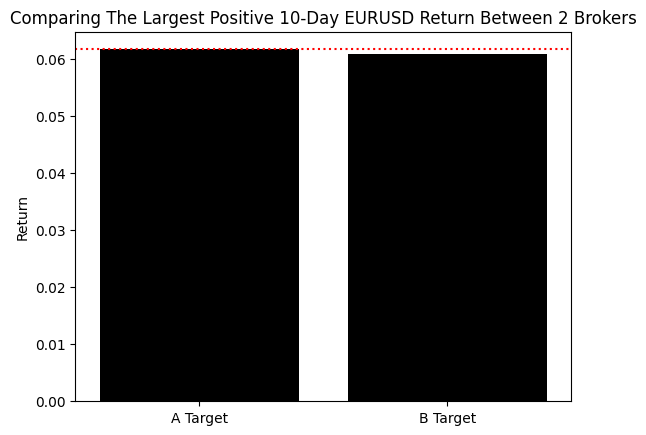

In [76]:
#Broker A demonstrated the largest positive return ever in our 4 year sample window
print(f'Percent Change in Maximum Return: {((combined.iloc[:,-2:].max()[0]-combined.iloc[:,-2:].max()[1]) / combined.iloc[:,-2:].max()[0]) * 100}%')
sns.barplot(combined.iloc[:,-2:].max(),color='black')
plt.axhline(np.max(combined.iloc[:,-2:].max()),color='red',linestyle=':')
plt.title('Comparing The Largest Positive 10-Day EURUSD Return Between 2 Brokers')
plt.ylabel('Return')

In [77]:
combined.iloc[:,-2:].max()

A Target    0.06165
B Target    0.06084
dtype: float64

Text(0, 0.5, 'Return')

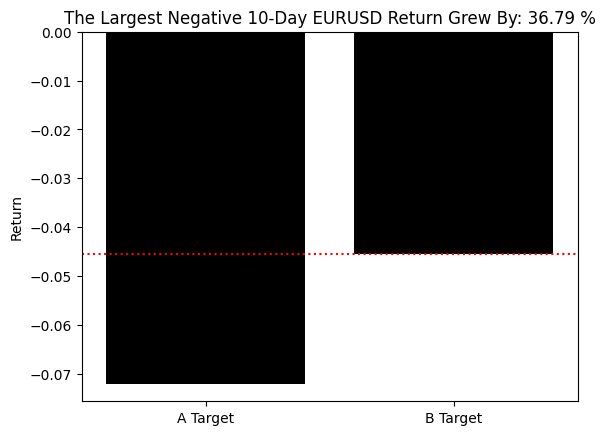

In [78]:
#Broker A also demonstrated the largest drawdown ever in our 4 year sample window
delta = (((combined.iloc[:,-2:].min()[0]-combined.iloc[:,-2:].min()[1]) / combined.iloc[:,-2:].min()[0]) *100)
delta_s = str(delta)


t = 'The Largest Negative 10-Day EURUSD Return Grew By: ' + delta_s[:5] + ' %'

sns.barplot(combined.iloc[:,-2:].min(),color='black')
plt.axhline(np.max(combined.iloc[:,-2:].min()),color='red',linestyle=':')
plt.title(t)
plt.ylabel('Return')

Text(0.5, 1.0, 'Broker B Appears To Have Inflated Returns')

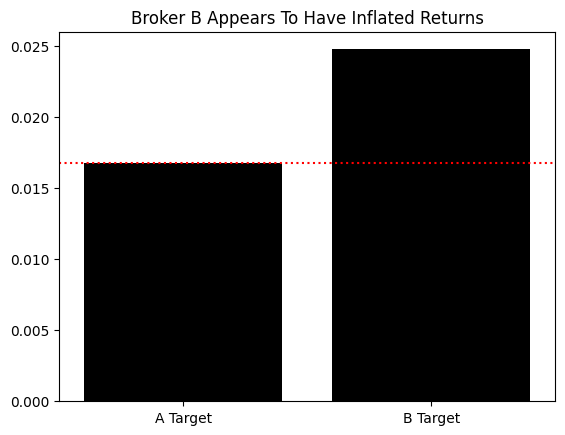

In [79]:
#Let's get a summary of the distribution of returns between the 2 brokers
#Both brokers have fat wide tail distrbutions, that can deviate far from the expected return
res = combined.iloc[:,-2:].mean()/combined.iloc[:,-2:].std()
sns.barplot(np.abs(res),color='black')
plt.axhline(np.min(np.abs(res)),color='red',linestyle=':')
plt.title('Broker B Appears To Have Inflated Returns')

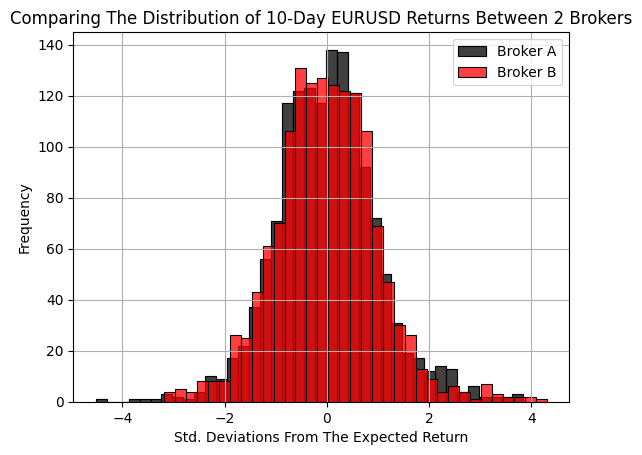

In [80]:
sns.histplot(((combined.iloc[:,-2]-combined.iloc[:,-2].mean())/combined.iloc[:,-2].std()),color='black')
sns.histplot(((combined.iloc[:,-1]-combined.iloc[:,-1].mean())/combined.iloc[:,-1].std()),color='red')
plt.xlabel('Std. Deviations From The Expected Return')
plt.ylabel('Frequency')
plt.title('Comparing The Distribution of 10-Day EURUSD Returns Between 2 Brokers')
plt.grid()
plt.legend(['Broker A','Broker B'])

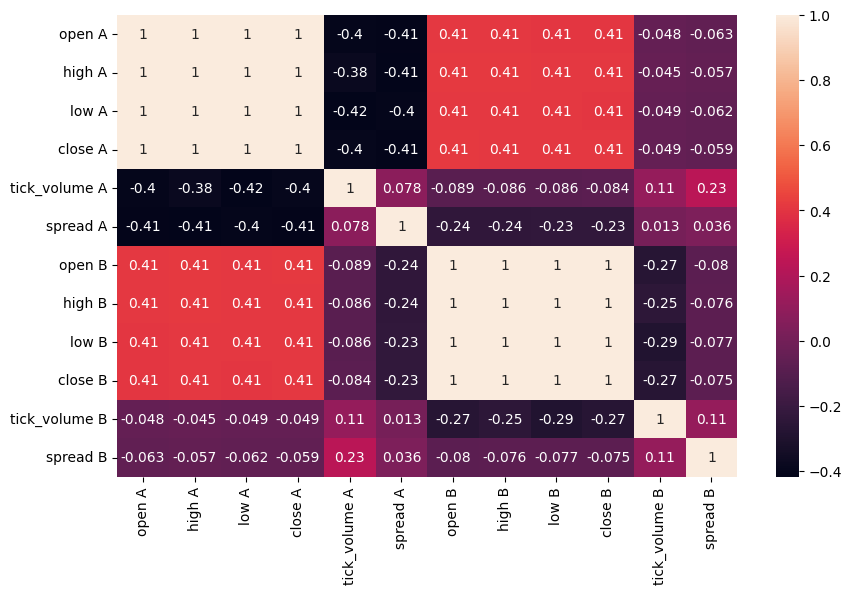

In [81]:
plt.figure(figsize=(10, 6))  # Adjust width and height as needed
sns.heatmap(combined.loc[:, inputs].corr(), annot=True)
plt.show()

In [82]:
from sklearn.model_selection import train_test_split,TimeSeriesSplit,cross_val_score
from sklearn.linear_model import Ridge

In [83]:
tscv = TimeSeriesSplit(n_splits=5,gap=HORIZON)

In [84]:
def get_model():
    return(Ridge())

In [85]:
train , test = train_test_split(combined,shuffle=False,test_size=0.5)

In [86]:
broker_a_tss = np.mean(np.abs(cross_val_score(get_model(),train.loc[:,['Null']],train.loc[:,'A Target'],scoring='neg_mean_squared_error',n_jobs=-1,cv=tscv)))

In [32]:
broker_b_tss = np.mean(np.abs(cross_val_score(get_model(),train.loc[:,['Null']],train.loc[:,'B Target'],scoring='neg_mean_squared_error',n_jobs=-1,cv=tscv)))

In [33]:
broker_a_rss = np.mean(np.abs(cross_val_score(get_model(),train.loc[:,inputs[0:(len(inputs)//2)]],train.loc[:,'A Target'],scoring='neg_mean_squared_error',n_jobs=-1,cv=tscv)))

In [34]:
broker_b_rss = np.mean(np.abs(cross_val_score(get_model(),train.loc[:,inputs[(len(inputs)//2):]],train.loc[:,'B Target'],scoring='neg_mean_squared_error',n_jobs=-1,cv=tscv)))

([<matplotlib.axis.XTick at 0x1b39689cb10>,
 [Text(0, 0, 'Broker A'), Text(1, 0, 'Broker B')])

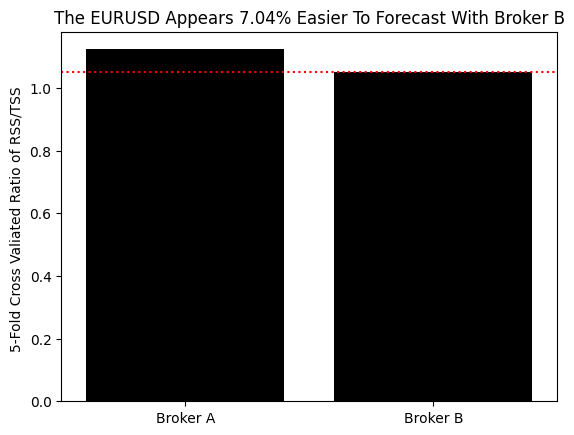

In [35]:
res = [(broker_a_rss/broker_a_tss),(broker_b_rss/broker_b_tss)]

eff = str(((res[0] - res[1])/res[1]) * 100)

t = 'The EURUSD Appears ' + eff[0:4] + '% Easier To Forecast With Broker B'

sns.barplot(res,color='black')
plt.axhline(np.min(res),color='red',linestyle=':')
plt.ylabel('5-Fold Cross Valiated Ratio of RSS/TSS ')
plt.title(t)
plt.xticks([0,1],['Broker A','Broker B'])

It appears to be easier to forecast the EURUSD 10-Day return with Broker B

In [36]:
b_inputs = inputs[len(inputs)//2:]

In [ ]:
model = get_model()

In [59]:
model.fit(train.loc[:,b_inputs[:-2]],train['B Target'])

GradientBoostingRegressor(random_state=0)

In [60]:
import skl2onnx,onnx

In [61]:
initial_types = [('float_input',skl2onnx.common.data_types.FloatTensorType([1,4]))]

In [62]:
onnx_proto = skl2onnx.convert_sklearn(model,initial_types=initial_types,target_opset=12)

In [63]:
onnx.save(onnx_proto,"EURUSD GBR D1.onnx")